In [1]:
from pattern.nl import singularize, pluralize, sentiment
import pandas as pd
from pandas.plotting import _converter
import matplotlib.pyplot as plt

In [2]:
singularize("critici")

'criticus'

In [3]:
pluralize('datum')

'datums'

In [4]:
## Sentiment analyse

print sentiment('Wat een waardeloos ding!')

(-1.0, 0.9)


In [5]:
reviews = pd.read_csv('TestReviews.csv', sep=';')

In [6]:
# loop voor beoordelen iedere tekst

gevoelens = []
categorieen = []
subjectiviteiten = []

for i in range(0, len(reviews)):
    gevoel = sentiment(reviews.tekst[i])
    gevoel = str(gevoel)
    gevoel = gevoel.split(",")
    subjectiviteit = gevoel[1].strip(")")
    subjectiviteit = float(subjectiviteit)
    gevoel = gevoel[0].strip("(")
    gevoel = float(gevoel)
    if gevoel > 0.75:
        categorie = "5. zeer positief"
    elif gevoel > 0.25:
        categorie =  "4. positief"
    elif gevoel > -0.25:
        categorie = "3. neutraal"
    elif gevoel > - 0.75:
        categorie = "2. negatief"
    else:
                categorie =   "1. zeer negatief"
    gevoelens.append(gevoel)
    subjectiviteiten.append(subjectiviteit)
    categorieen.append(categorie)
    
    print(categorie)
    print(gevoel)
    print(subjectiviteit)

5. zeer positief
1.0
1.0
4. positief
0.7
1.0
2. negatief
-0.275
0.65
2. negatief
-0.373333333333
0.53
3. neutraal
0.0
0.0
3. neutraal
0.2
1.0
3. neutraal
-0.125
0.65
1. zeer negatief
-0.75
1.0


In [7]:
reviews["gevoelens"] = gevoelens
reviews["subjectiviteit"] = subjectiviteiten
reviews["categorie"] = categorieen

In [8]:
import matplotlib.pyplot
reviews

,klantnummer,cijfer,tekst,gevoelens,subjectiviteit,categorie
0,1,8,Ik vind dit een extreem goed product,1.000000,1.00,5. zeer positief
1,2,7,Dit apparaat werkt prima,0.700000,1.00,4. positief
2,3,3,"Wat is dit een waardeloos ding, echt zonde van...",-0.275000,0.65,2. negatief
3,4,5,"Niet kopen, te laat geleverd en een zeer slech...",-0.373333,0.53,2. negatief
4,5,6,Het kan wel beter,0.000000,0.00,3. neutraal
5,6,0,Lachwekkend,0.200000,1.00,3. neutraal
6,7,2,Wat was dit een verschrikkelijk product. Het w...,-0.125000,0.65,3. neutraal
7,8,2,Dit was een heel erg slecht en en teleurstelle...,-0.750000,1.00,1. zeer negatief


In [9]:
plt.style.use('ggplot')

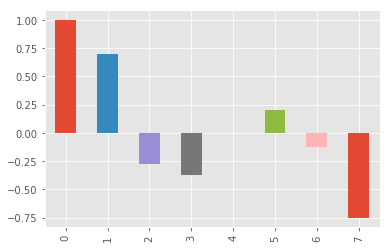

In [10]:
plt.figure();
reviews.gevoelens.plot(kind='bar')

In [11]:
plt.show()

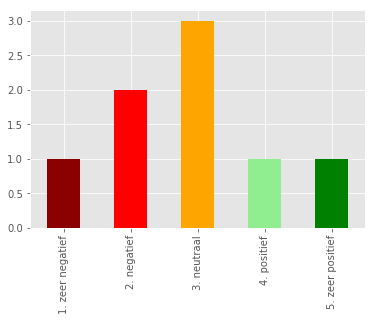

In [12]:
reviews.categorie.value_counts().sort_index().plot(kind='bar', color = ["darkred", "red","orange", "lightgreen","green"])
plt.show()

In [13]:
# Exporteer bestand als csv
reviews.to_csv("SentimentReviews", sep=';')